# Tag2Text 모델 도로 노면 예측 결과

In [90]:
import pandas as pd

df = pd.read_csv('tag2text_image_classification(final_30000).csv')
df.head()

,class,data,tag,spe_tag,caption,label,pred
0,Normal,Normal\frame1.jpg,['building | traffic light | night | city | ci...,weather,a night time view of a city street scene,0,0
1,Normal,Normal\frame10.jpg,['city | highway | crane | road | construction...,weather,a view of a city road during the day,0,0
2,Normal,Normal\frame100.jpg,['building | traffic | city | intersection | r...,weather,a busy city intersection on a cloudy day,0,0
3,Normal,Normal\frame1000.jpg,['highway | vehicle | mountain | road | car'],weather,a view of a highway sign on a foggy day,0,0
4,Normal,Normal\frame10000.jpg,['highway | sign | road | street | car | truck...,weather,a view of a city road on a sunny day,0,0


In [85]:
df = df.rename(columns={'class':'클래스','data':'사진','tag':'물체/상황','spe_tag':'입력 단어','caption':'묘사','label':'실제값','pred':'예측값'})
df.sample(5).sort_index()

,클래스,사진,물체/상황,입력 단어,묘사,실제값,예측값
8048,Normal,Normal\frame8241.jpg,['vehicle | road | street | car | truck | driv...,weather,there is a one way street that is right next t...,0,0
12375,Rainy,Rainy\frame3135.jpg,['rain | windshield | highway | vehicle | road...,weather,a view of a car's dashboard on a foggy day,1,1
14443,Rainy,Rainy\frame4998.jpg,['fog | rain | highway | freeway | road | car ...,weather,a view of a foggy driving on a rainy day,1,1
25468,Snowy,Snowy\frame592.jpg,['winter | road | street | snow | snowy'],weather,a snowy winter road on a snowy day,2,2
29577,Snowy,Snowy\frame9618.jpg,['winter | city | road | street | tree | snow ...,weather,a view of a ski area on a snowy day,2,2


In [29]:
df.sample(5)

,클래스,사진,물체/상황,입력 단어,묘사,실제값,예측값
26994,Snowy,Snowy\frame7293.jpg,['winter | mountain road | mountain | road | t...,weather,a snowy winter road in the country side,2,2
24611,Snowy,Snowy\frame5148.jpg,['city | city street | road | street | snow | ...,weather,a view of a snowy street intersection on a sno...,2,2
1310,Normal,Normal\frame2177.jpg,['highway | vehicle | road | car'],weather,the view from the passenger seat of a highway ...,0,0
17171,Rainy,Rainy\frame7452.jpg,['winter | fog | road | tree | snow'],weather,a winter road is quiet on a snowy day,1,2
13439,Rainy,Rainy\frame4093.jpg,['fog | rain | highway | mountain | road | clo...,weather,a foggy drive on a rainy day,1,1


In [4]:
# 총 3만개 데이터
# 클래스별 각 10000개 데이터

df['class'].value_counts()

class
Normal    10000
Rainy     10000
Snowy     10000
Name: count, dtype: int64

In [87]:
import numpy as np

### Accuracy

In [93]:
acc = len(df[(df['label']==df['pred'])]) / len(df['label'])
print("Accuary : ",np.round(acc,4))

Accuary :  0.8696


In [31]:
def class_acc(df,class_name):

    class_names = ['Normal','Rainy','Snowy']

    df_class = df[df['label']==class_names.index(class_name)]
    acc = len(df_class[(df_class['label']==df_class['pred'])]) / len(df_class['label'])

    print("'"+class_name+"'" + " class의 Accuracy : ",acc)

In [32]:
# Normal acc

class_acc(df,'Normal')

'Normal' class의 Accuracy :  0.9991


In [33]:
# Rainy acc

class_acc(df,'Rainy')

'Rainy' class의 Accuracy :  0.6408


In [34]:
# Snowy acc

class_acc(df,'Snowy')

'Snowy' class의 Accuracy :  0.969


### 오차행렬

In [37]:
from sklearn.metrics import confusion_matrix

y_test = list(df['label'])
preds = list(df['pred'])

len(y_test), len(preds)

(30000, 30000)

In [38]:
confusion_matrix(y_test, preds)

array([[9991,    9,    0],
       [2762, 6408,  830],
       [  20,  290, 9690]], dtype=int64)

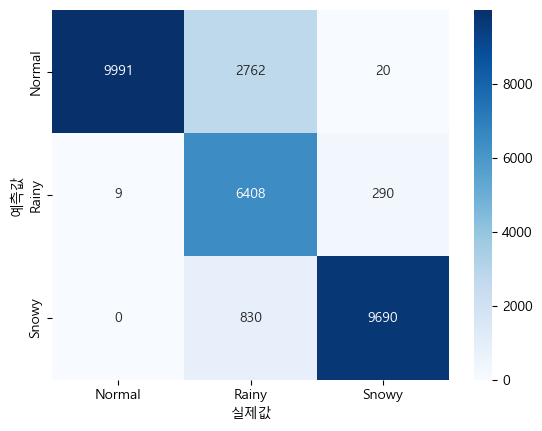

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

cm = confusion_matrix(preds,y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.xticks([0.5,1.5,2.5],labels=['Normal','Rainy','Snowy'])
plt.yticks([0.5,1.5,2.5],labels=['Normal','Rainy','Snowy'])
plt.show()

### 실제값 Rainy , 예측값 Normal 데이터 확인

In [63]:
df_1_0 = df[(df['label']==1) & (df['pred']==0)]
df_1_0

,class,data,tag,spe_tag,caption,label,pred
10000,Rainy,Rainy\frame1.jpg,['man'],weather,a large jetliner taking off from a runway,1,0
10002,Rainy,Rainy\frame100.jpg,['car | tunnel | drive | travel'],weather,a view of the inside of a subway tunnel,1,0
10004,Rainy,Rainy\frame10000.jpg,['fog | highway | road | picture | street | ca...,weather,a view of a foggy car's dashboard during the day,1,0
10008,Rainy,Rainy\frame1004.jpg,['highway | hand | vehicle | road | picture | ...,weather,a car's dashboard is shown in the dark,1,0
10014,Rainy,Rainy\frame101.jpg,['car | tunnel | drive'],weather,a view of the inside of a subway tunnel,1,0
...,...,...,...,...,...,...,...
19995,Rainy,Rainy\frame9995.jpg,['traffic | vehicle | light | road | picture |...,weather,a view of a car's dashboard during a foggy day,1,0
19996,Rainy,Rainy\frame9996.jpg,['traffic | highway | vehicle | light | road |...,weather,a view of a car's dashboard during a foggy day,1,0
19997,Rainy,Rainy\frame9997.jpg,['highway | vehicle | road | picture | street ...,weather,a view of a car's dashboard on a foggy day,1,0
19998,Rainy,Rainy\frame9998.jpg,['fog | highway | vehicle | road | picture | s...,weather,a view of a foggy car's dashboard during the day,1,0


In [64]:
df_1_0[['tag','caption']].sample(10)

,tag,caption
14369,['car | tunnel | drive'],a view of the inside of a subway tunnel
19071,['fog | traffic | highway | vehicle | road | p...,a view of a car's dashboard during a foggy day
19750,['highway | vehicle | road | picture | street ...,a view of a car's dashboard during a foggy day
10600,['car | tunnel | drive'],a view of the inside of a subway tunnel
19109,['fog | traffic | highway | vehicle | road | p...,a view of a foggy highway scene from a vehicle...
18025,['highway | city street | vehicle | bus | ligh...,a view of a city road during a foggy day
13737,['vehicle | car | tunnel | drive | travel'],a view of the inside of a subway tunnel
11139,['night | highway | light | car | tunnel | dri...,a night time shot of the inside of a car tunnel
10790,['light | car | tunnel | drive | travel | dark'],a view of the inside of a metro tunnel
18961,['bridge | highway | vehicle | road | picture ...,a view of a highway traffic on a foggy day


In [ ]:
# df_1_0[[x for x in list(df_1_0['caption']) if 'foggy' in x.split() True else False ]]

In [77]:
captions = list(df_1_0['caption'])
captions[:5]

['a large jetliner taking off from a runway',
 'a view of the inside of a subway tunnel',
 "a view of a foggy car's dashboard during the day",
 "a car's dashboard is shown in the dark",
 'a view of the inside of a subway tunnel']

In [81]:
cnt = 0
for caption in captions:
    caption = caption.split()
    if 'foggy' in caption and 'rain' not in caption:
        cnt += 1
cnt

1480

In [82]:
# 실제값 Rainy, 예측값 Normal인 경우 안개낀 날씨(foggy)로 분류한 경우가 대부분

cnt/len(df_1_0)

0.5358435916002896